# Regresion lineal EVI en Lago San Roque _ VillaCarlosPaz

Se genero un dataset a partir de observaciones satelitales que contemplan un periodo de 2019 en adelante.
La idea es utilizar estos datos para generar un modelo que pueda estimar la prolisferacion de cianobacterias en el lago San Roque.




In [21]:
#Librerias
import matplotlib.pylab as plt 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

In [28]:
# Traemos los datos

file = 'C:\\Users\\Bruno\\Desktop\\Data Science\\EjerciciosPandas\\EVI_Lago_SanRoque\\DataSet_EVI_LagoSanRoque.csv' 

d = pd.read_csv(file, decimal= ",")
df= pd.DataFrame(d)
d.head() 

,Index,Fecha,EVI
0,1,01/2019,0.273
1,2,02/2019,0.282
2,3,03/2019,0.318
3,4,04/2019,0.315
4,5,05/2019,0.201


In [29]:
d_filtrado = d[['Index',
                'EVI'
                ]].dropna().copy() # Nos quedamos con ciertos campos del data set, para facilitar el trabajo. Y para limitarlo.
                                                  # Notar que primero aplicamos el método .dropna() para eliminar filas que tengan alguna columna con NaN
                                                  # Ademas, el metodo copy() nos asegura que estemos creando un nuevo dataframe


Text(0.5, 0, 'Fechas')

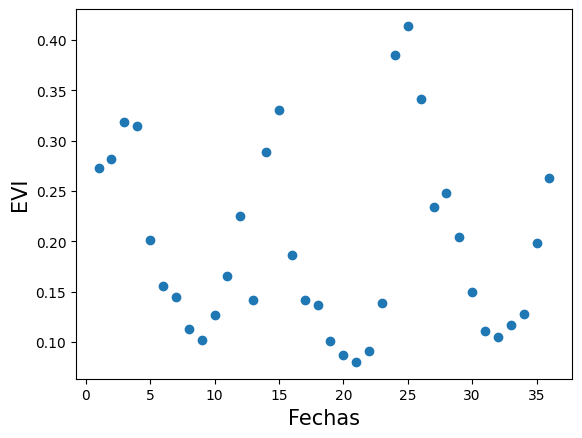

In [30]:
fecha = np.array(d_filtrado['Index'])
ciano = np.array(d_filtrado['EVI'])



X = fecha.reshape(-1, 1) # esto es necesario para transformar el vector en matriz y usarlo en el eje

y= ciano

plt.scatter(X,y)
plt.ylabel(r'EVI', fontsize=15, color='black')
plt.xlabel(r'Fechas', fontsize=15, color='black')


# Modelado


In [31]:
## Modelo estimado
# Creación del modelo lineal
reg = LinearRegression()

# Ajuste del modelo
reg.fit(X, y)

# Coeficientes del modelo
beta_0_estimado = reg.intercept_
beta_1_estimado = reg.coef_[0]

print('Ordenada al origen = {:.3f}'.format(beta_0_estimado))
print('Pendiente = {:.3f}'.format(beta_1_estimado))

# Calidad del ajuste
print('Calidad de ajuste R^2 = {:.3f}'.format(reg.score(X, y)))

Ordenada al origen = 0.214
Pendiente = -0.001
Calidad de ajuste R^2 = 0.013


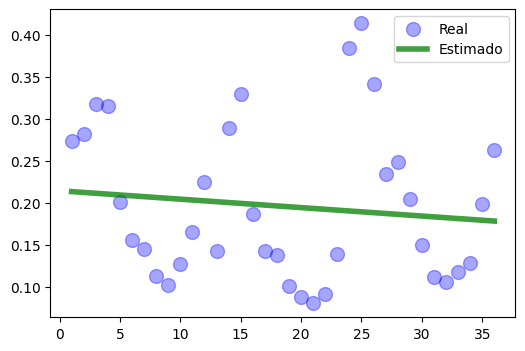

In [32]:
## Graficos

fig, ax = plt.subplots(1, 1, figsize = (6, 4))

# Puntos de entrenamiento
ax.scatter(X, y, color = 'b', alpha = 0.35, s = 100)

# Relacion estimada
y_estimado = np.polyval([beta_1_estimado, beta_0_estimado], X)
ax.plot(X, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

ax.legend(['Real', 'Estimado'])
plt.show()

In [74]:
# Términos polinómicos,"polyfeats".
polyfeats = PolynomialFeatures(degree = 9, include_bias = True)

X_poly = polyfeats.fit_transform(X)

print(X_poly)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
  2.56000000e+02 5.12000000e+02]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03
  6.56100000e+03 1.96830000e+04]
 [1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
  2.56000000e+02 1.02400000e+03 4.09600000e+03 1.63840000e+04
  6.55360000e+04 2.62144000e+05]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02
  6.25000000e+02 3.12500000e+03 1.56250000e+04 7.81250000e+04
  3.90625000e+05 1.95312500e+06]
 [1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03 7.77600000e+03 4.66560000e+04 2.79936000e+05
  1.67961600e+06 1.00776960e+07]
 [1.00000000e+00 7.00000000e+00 4.90000000e+01 3.43000000e

In [75]:
## Creación y ajuste del modelo


reg = LinearRegression(fit_intercept = False)

# Ajuste del modelo con los términos polinómicos
reg.fit(X_poly, y)

# Coeficientes del modelo, el orden corresponde a las columnas de X_poly
print('Coeficientes = {}'.format(reg.coef_))

Coeficientes = [ 1.76653126e-01  7.46317357e-02  2.51702780e-02 -2.12294534e-02
  4.33067019e-03 -4.20298601e-04  2.23375167e-05 -6.66271643e-07
  1.04697799e-08 -6.74800354e-11]


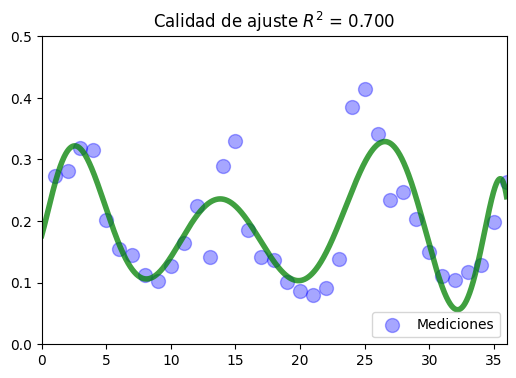

In [76]:
## Graficos

fig, ax = plt.subplots(1, 1, figsize = (6, 4))

# Puntos de entrenamiento
ax.scatter(X, y, color = 'b', alpha = 0.35, s = 100)

# Relacion estimada
x_aux = np.arange(0, 36, 0.01)
y_estimado = np.polyval(np.flip(reg.coef_), x_aux)
ax.plot(x_aux, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

# Calidad del ajuste
ax.set_title('Calidad de ajuste $R^2$ = {:.3f}'.format(reg.score(X_poly, y)))

ax.set_ylim([-0, 0.5])
ax.set_xlim([0, 36])

ax.legend(['Mediciones'], loc = 4)
plt.show()